In [1]:
import numpy as np
from expr import *
from simplify import *

In [2]:
def random_binary_expression(depth: int, options):
    if depth == 0:
        if np.random.choice(2) == 0:
            return ConstantExpression(np.random.randint(1, 10))
        else:
            return VariableExpression("x")
    else:
        op = np.random.choice(options["BINARY_OPERATORS"])
        expr = BinaryExpression(op, random_binary_expression(depth - 1, options), random_binary_expression(depth - 1, options))
        if np.random.choice(5) == 0:
            op = np.random.choice(options["UNARY_OPERATORS"])
            expr = UnaryExpression(op, expr)
        return expr

(256 - 3 * x) + x ^ 9 * (x - x)
(256.84059041610476 ^ (0.5414694326385938 ^ x)) ^ ((x / 11.503306617088745) / x ^ x)
0.7511684475403018


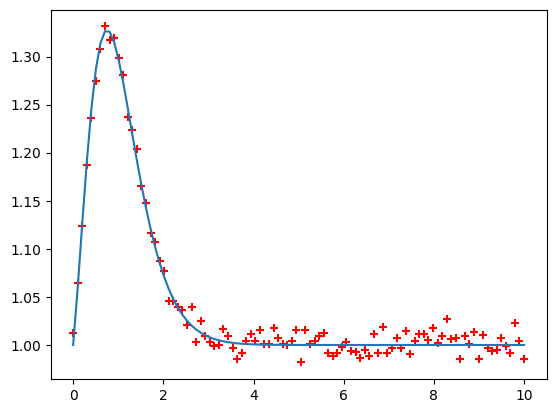

In [3]:
import matplotlib.pyplot as plt

options = { "BINARY_OPERATORS": [ e for e in BinaryOp ], "UNARY_OPERATORS": [ e for e in UnaryOp ] }
expr = random_binary_expression(3, options).simplify()
print(expr)

mutator = SequentialMutator(
    [
        RandomConstantMutator(),
        RandomBinaryOperatorMutator()
    ])
mutator.visit(expr)
print(expr)

N = 100
X = np.linspace(0, 10, N)
Y = expr.evaluate({ "x": X })
Y_NOISE = Y + np.random.normal(size=np.shape(X)[0], scale=np.std(Y) * 0.1)
risk = np.sum(np.abs(Y - Y_NOISE))
print(risk)
plt.plot(X, Y)
plt.scatter(X, Y + np.random.normal(size=np.shape(X)[0], scale=np.std(Y) * 0.1), marker='+', color='red')
plt.show()

# Example

## Input data

In [4]:
N = 1000
X = np.linspace(0, 1, N)
Y = np.sin(4 * X) + 0.5 * X

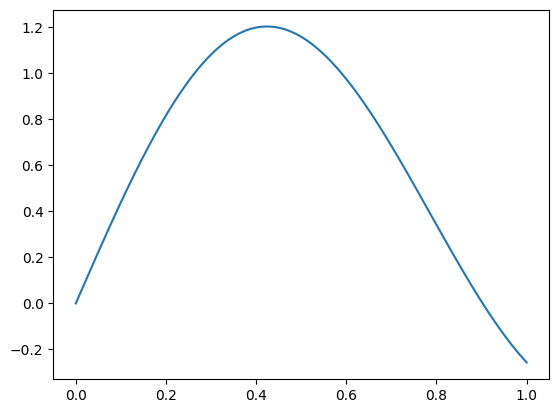

In [5]:
plt.plot(X, Y)
plt.show()

## Regression

In [6]:
import copy

In [13]:
MAX_DEPTH = 3
K_BEST = 5
POPULATION_SIZE = 10000
EPOCHS = 10
OPTIONS = {
    "BINARY_OPERATORS": [ BinaryOp.ADD, BinaryOp.MUL ], 
    "UNARY_OPERATORS": [ UnaryOp.SIN, UnaryOp.SQRT, UnaryOp.TAN ]
}

def loss(formula):
    predicted_y = formula.evaluate({ "x": X })
    l = np.mean((Y - predicted_y) ** 2)
    if np.isnan(l):
        return np.inf
    else:
        return l

formulas = [ random_binary_expression(MAX_DEPTH, OPTIONS) for _ in range(POPULATION_SIZE) ]
best_formula_indices = np.argpartition([ loss(formula) for formula in formulas ], K_BEST)[:K_BEST]
best_formulas = [ formulas[index] for index in best_formula_indices ]
for formula in best_formulas:
    print(formula)

# best_formula = BinaryExpression(BinaryOp.ADD,
#     UnaryExpression(UnaryOp.SIN, 
#                     BinaryExpression(BinaryOp.MUL, 
#                                      ConstantExpression(1), 
#                                      VariableExpression("x"))),
#     BinaryExpression(BinaryOp.MUL,
#                      ConstantExpression(1),
#                      VariableExpression("x")))

p = np.array([ 3, 2, 2, 5, 1 ])
p = p / np.sum(p)
mutator = RandomMutator(
        [ 
            RandomConstantMutator(),
            RandomBinaryOperatorMutator(OPTIONS["BINARY_OPERATORS"]),
            RandomUnaryOperatorMutator(OPTIONS["UNARY_OPERATORS"]),
            RandomUnaryDeleterMutator(p=1),
            RandomBinaryDeleterMutator(p=1)
        ], p)

for i in range(EPOCHS):
    formulas = [ copy.deepcopy(np.random.choice(best_formulas)) for _ in range(int(POPULATION_SIZE * 0.8)) ]
    for _ in range(int(POPULATION_SIZE * 0.2)):
        formulas.append(random_binary_expression(MAX_DEPTH, OPTIONS))

    best_formula = best_formulas[np.argmin([loss(f) for f in best_formulas])]
    print(f"EPOCH {i}: {loss(best_formula)}: {best_formula}")
    for formula in formulas:
        mutator.visit(formula)
    best_formula_indices = np.argpartition([ loss(formula) for formula in formulas ], K_BEST)[:K_BEST]
    best_formulas = [ formulas[index].simplify() for index in best_formula_indices ]

c:\Users\gruni\Desktop\ENS\M1\Machine Learning Physique\MLP-SymReg\expr.py:67: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(value)


sin((x * x + (x + x)) + (5 * 9 + tan(7 + 5)))
sin(x + 3) * (9 * x) + ((x + x) + 4 * x)
sin(sin((x + 4) + (x + x)) + ((5 + x) + (2 + 1)))
sin((3 * x + (x + 3)) + (3 * 5 + (6 + 7)))
sin((x * 1 + tan(3 + 3)) + (2 + x) * (1 * x))
EPOCH 0: 0.024633423854986868: sin((x * x + (x + x)) + (5 * 9 + tan(7 + 5)))
EPOCH 1: 0.014937201491044941: sin((2.304173050102091 * x + (x + 3.706852196342676)) + (1.451099615361683 * 5.916516353832278 + (4.820111560937245 + 8.121329034339219)))
EPOCH 2: 0.014264885093288045: sin((2.304173050102091 * x + (x + 3.7368576252881684)) + (1.451099615361683 * 5.916516353832278 + (4.820111560937245 + 8.121329034339219)))
EPOCH 3: 0.01425738024190004: sin((2.304173050102091 * x + (x + 3.7368576252881684)) + (1.7536734681356771 * 4.038124769528858 + (5.92393495515493 + 8.526583128544962)))
EPOCH 4: 0.01425738024190004: sin((2.304173050102091 * x + (x + 3.7368576252881684)) + (1.7536734681356771 * 4.038124769528858 + (5.92393495515493 + 8.526583128544962)))
EPOCH 5: 0.01425

sin(4x) + 0.5x
sin(x) * (x * x) + sin((x + x) + (x + x))
0.015902766792965747


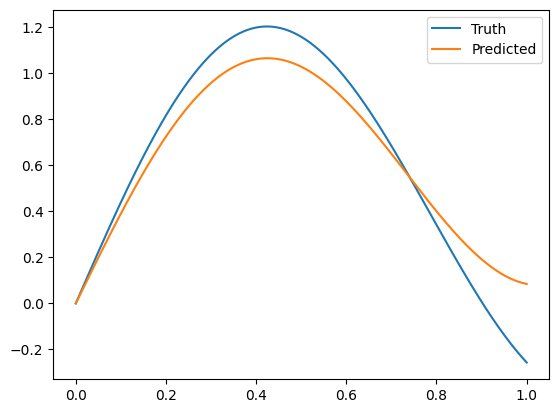

In [8]:
print("sin(4x) + 0.5x")
print(best_formula)
print(loss(best_formula))
plt.plot(X, Y, label="Truth")
plt.plot(X, best_formula.evaluate({ "x": X }), label="Predicted")
plt.legend()
plt.show()